<a href="https://colab.research.google.com/github/darcor99/Python-Fraud-Analysis/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!pip install kaggle

In [16]:
import os
from google.colab import userdata

# Set environment variables for Kaggle credentials
os.environ['KAGGLE_USERNAME'] = userdata.get('KAGGLE_USERNAME')
os.environ['KAGGLE_KEY'] = userdata.get('KAGGLE_KEY')
!pwd

/content


In [17]:
!kaggle datasets download -d kartik2112/fraud-detection

Dataset URL: https://www.kaggle.com/datasets/kartik2112/fraud-detection
License(s): CC0-1.0
fraud-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [18]:
!ls -l

!unzip fraud-detection.zip

total 206808
-rw-r--r-- 1 root root 211766662 Aug  5  2020 fraud-detection.zip
drwxr-xr-x 1 root root      4096 Jul 18 13:38 sample_data
Archive:  fraud-detection.zip
  inflating: fraudTest.csv           
  inflating: fraudTrain.csv          


In [19]:
!ls -l

total 696648
-rw-r--r-- 1 root root 211766662 Aug  5  2020 fraud-detection.zip
-rw-r--r-- 1 root root 150354339 Aug  5  2020 fraudTest.csv
-rw-r--r-- 1 root root 351238196 Aug  5  2020 fraudTrain.csv
drwxr-xr-x 1 root root      4096 Jul 18 13:38 sample_data


In [20]:
TrainingSet = '/content/fraudTrain.csv'
TestSet = '/content/fraudTest.csv'

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
!pip3 install pandasql
import pandasql as ps
from pandasql import sqldf
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [22]:
Train_df=pd.read_csv(TrainingSet)
Test_df = pd.read_csv(TestSet)

In [23]:
print(Train_df.head(10));

Train_df.columns

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   
5           5   2019-01-01 00:04:08  4767265376804500   
6           6   2019-01-01 00:04:42    30074693890476   
7           7   2019-01-01 00:05:08  6011360759745864   
8           8   2019-01-01 00:05:18  4922710831011201   
9           9   2019-01-01 00:06:01  2720830304681674   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy 

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [24]:
print('training set rows:= {}'.format(len(Train_df.index)));
print('test set rows:= {}'.format(len(Test_df.index)));


training set rows:= 1296675
test set rows:= 555719


In [25]:
Train_df.info(), print('\n')
Train_df.is_fraud.unique(), print('\n')
Train_df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

,0
Unnamed: 0,int64
trans_date_trans_time,object
cc_num,int64
merchant,object
category,object
amt,float64
first,object
last,object
gender,object
street,object


In [26]:
##need to drop unnecessary variables before doing log regression

##dropped many of the non-int/non-float columns for the training and test sets


##make a column in test and training sets for difference between merchant lat,long and user lat,long

X_train = Train_df.drop(columns = ['is_fraud', 'Unnamed: 0', 'cc_num', 'trans_date_trans_time', 'merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num'])
y_train = Train_df['is_fraud']

X_test = Test_df.drop(columns = ['is_fraud', 'Unnamed: 0',  'cc_num', 'trans_date_trans_time', 'merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num'])
y_test = Test_df['is_fraud']

#make columns for difference in lat/long, and --try make a column for number of transactions done in 1 day (if possible,... hard to do with unix time, might have to build timeseries model for this)
X_train['lat_dif'] = abs(X_train['merch_lat'] - X_train['lat'])
X_train['long_dif'] = abs(X_train['merch_long'] - X_train['long'])

X_test['lat_dif'] = abs(X_test['merch_lat'] - X_test['lat'])
X_test['long_dif'] = abs(X_test['merch_long'] - X_test['long'])



In [27]:
#do CV on the training set and then test on the test set



In [28]:
#LogRgr = LogisticRegression()
#LogRgr.fit(X_train, y_train)

LogRgr = LogisticRegressionCV(cv = 5, max_iter = 500, solver = 'liblinear', random_state = 14021, scoring = 'accuracy', verbose = 0)
LogRgr.fit(X_train, y_train)

LogisticRegressionCV(cv=5, max_iter=500, random_state=14021, scoring='accuracy',
                     solver='liblinear')

In [29]:

# Accessing the results of 5-fold CV for LogisticRegressionCV
print(LogRgr.scores_) #Scores for each fold
print(LogRgr.coef_) #Coefficients for the model trained on the whole dataset
print(LogRgr.intercept_) #Intercept for the model trained on the whole dataset
print(LogRgr.C_) #Optimal regularization parameter C found by CV
print(LogRgr.Cs_) #All values of C tried during CV


{np.int64(1): array([[0.99421212, 0.99421212, 0.99421212, 0.99421212, 0.99421212,
        0.99421212, 0.99421212, 0.99421212, 0.99421212, 0.99421212],
       [0.99421212, 0.99421212, 0.99421212, 0.99421212, 0.99421212,
        0.99421212, 0.99421212, 0.99421212, 0.99421212, 0.99421212],
       [0.99421212, 0.99421212, 0.99421212, 0.99421212, 0.99421212,
        0.99421212, 0.99421212, 0.99421212, 0.99421212, 0.99421212],
       [0.99421212, 0.99421212, 0.99421212, 0.99421212, 0.99421212,
        0.99421212, 0.99421212, 0.99421212, 0.99421212, 0.99421212],
       [0.99420826, 0.99420826, 0.99420826, 0.99420826, 0.99420826,
        0.99420826, 0.99420826, 0.99420826, 0.99420826, 0.99420826]])}
[[ 5.81440282e-16 -1.39278590e-13 -1.08757033e-16  2.55652201e-16
  -2.36919615e-13 -3.81502480e-09 -1.08772228e-16  2.55653192e-16
  -1.41036165e-18 -1.41611675e-18]]
[-2.8276448e-18]
[0.0001]
[1.00000000e-04 7.74263683e-04 5.99484250e-03 4.64158883e-02
 3.59381366e-01 2.78255940e+00 2.15443469e+0

In [30]:
Y_Pred = LogRgr.predict(X_test)

In [31]:
LogRgr.score(X_test,y_test) #99.6% accuracy

0.9961401355721147

In [32]:
coef = LogRgr.coef_[0]
print(X_train.columns)
print(coef)



Index(['amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat',
       'merch_long', 'lat_dif', 'long_dif'],
      dtype='object')
[ 5.81440282e-16 -1.39278590e-13 -1.08757033e-16  2.55652201e-16
 -2.36919615e-13 -3.81502480e-09 -1.08772228e-16  2.55653192e-16
 -1.41036165e-18 -1.41611675e-18]


In [33]:
LogRgr.predict_proba(X_test)

array([[0.99469357, 0.00530643],
       [0.99469357, 0.00530643],
       [0.99469357, 0.00530643],
       ...,
       [0.9950198 , 0.0049802 ],
       [0.9950198 , 0.0049802 ],
       [0.9950198 , 0.0049802 ]])

In [34]:
X_train2 = Train_df.drop(columns = ['is_fraud', 'Unnamed: 0', 'cc_num', 'trans_date_trans_time', 'merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num'])
y_train2 = Train_df['is_fraud']

X_test2 = Test_df.drop(columns = ['is_fraud', 'Unnamed: 0',  'cc_num', 'trans_date_trans_time', 'merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num'])
y_test2 = Test_df['is_fraud']

#make columns for difference in lat/long, and --try make a column for number of transactions done in 1 day (if possible,... hard to do with unix time, might have to build timeseries model for this)
X_train2['lat_dif'] = abs(X_train['merch_lat'] - X_train['lat'])
X_train2['long_dif'] = abs(X_train['merch_long'] - X_train['long'])

X_test2['lat_dif'] = abs(X_test['merch_lat'] - X_test['lat'])
X_test2['long_dif'] = abs(X_test['merch_long'] - X_test['long'])


X_train2 = X_train2.drop(columns = ['zip', 'lat', 'long', 'merch_lat', 'merch_long', 'city_pop'])
X_test2 = X_test2.drop(columns = ['zip', 'lat', 'long', 'merch_lat', 'merch_long', 'city_pop'])

In [35]:
LogReg2 = LogisticRegression()
LogReg2.fit(X_train2, y_train2)

LogisticRegression()

In [36]:
LogReg2.score(X_test2, y_test2)

0.9961401355721147

Model has high training and testing scores, with test score of 99.6% accuracy. The model performed well on this simulated data.

It is worth keeping in mind that this is a relatively small dataset, and it is simulated data, not real-world data.

This model may perform much differently with real-world data due to it being more complex and also due to the sheer size of real-world transactional information that banks and other financial institutions handle.

Training set class distribution:
is_fraud
0    1289169
1       7506
Name: count, dtype: int64

Testing set class distribution:
is_fraud
0    553574
1      2145
Name: count, dtype: int64


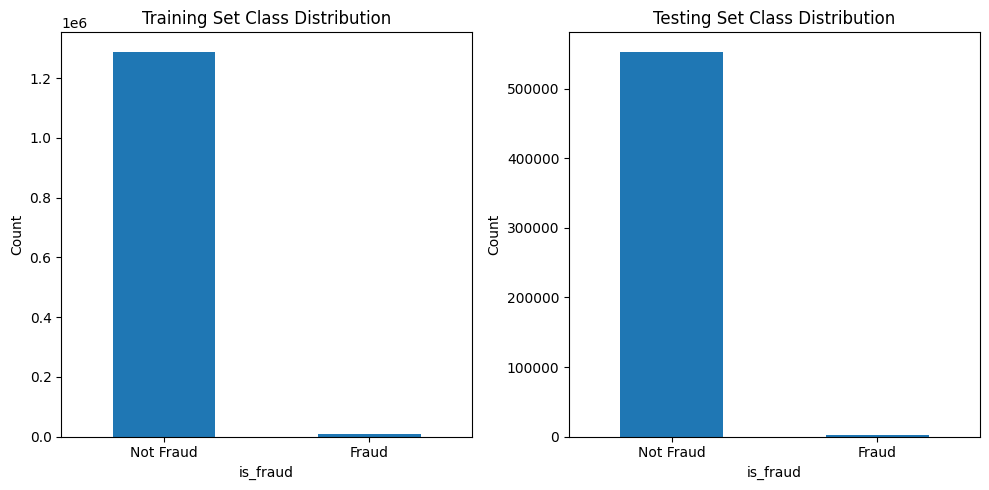

In [37]:
#check  for  class imbalance here?

import matplotlib.pyplot as plt
print("Training set class distribution:")
print(Train_df['is_fraud'].value_counts())
print("\nTesting set class distribution:")
print(Test_df['is_fraud'].value_counts())

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
Train_df['is_fraud'].value_counts().plot(kind='bar')
plt.title('Training Set Class Distribution')
plt.xlabel('is_fraud')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Fraud', 'Fraud'], rotation=0)

plt.subplot(1, 2, 2)
Test_df['is_fraud'].value_counts().plot(kind='bar')
plt.title('Testing Set Class Distribution')
plt.xlabel('is_fraud')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Fraud', 'Fraud'], rotation=0)

plt.tight_layout()
plt.show()


Classes are very imbalanced here,  as expected in fraud datasets.

Can look at following  metrics:
>Precision, Recall, F1-score

>AUC-ROC, PR AUC (especially important when classes are highly imbalanced)

>Confusion Matrix to monitor false negatives (missed frauds)


Can also look at undersampling the majority class or overssampling the minority class in training here.

In [40]:
from sklearn.metrics import roc_auc_score

# Get predicted probabilities for the positive class
y_probs = LogReg2.predict_proba(X_test2)[:, 1]

# Compute AUC-ROC
roc_auc = roc_auc_score(y_test2, y_probs)
print("AUC-ROC:", roc_auc)

AUC-ROC: 0.5646741454763509


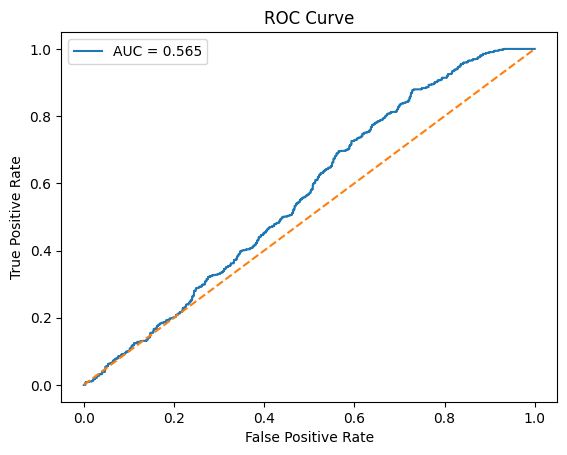

In [42]:


from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test2, y_probs)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

The ROC Curve is above the is above the diagonal:

> This means the model  performs better than random